In [1]:
import pandas as pd
import numpy as np

# Set random seed
np.random.seed(42)

# Companies
companies = [
    "Penguin Random House",
    "HarperCollins",
    "Hachette UK"
]

# Stores
stores = [
    "Waterstones",
    "WHSmith",
    "Independent Bookstore"
]

# Cities in England
cities = [
    "London",
    "Manchester",
    "Birmingham",
    "Leeds",
    "Liverpool",
    "Bristol",
    "Sheffield"
]

# Genres
genres = [
    "Science Fiction",
    "Fantasy",
    "Horror"
]

# Age groups
age_groups = [
    "18-25",
    "26-40",
    "41-60",
    "60+"
]

# Generate dataset
data = []

for company in companies:
    for store in stores:
        for city in cities:
            for genre in genres:
                for age in age_groups:
                    
                    units_sold = np.random.randint(50, 500)
                    
                    price = np.random.uniform(8, 20)
                    
                    revenue = units_sold * price
                    
                    profit_margin = np.random.uniform(0.2, 0.4)
                    
                    weekly_profit = revenue * profit_margin
                    
                    yearly_profit = weekly_profit * 52
                    
                    data.append([
                        company,
                        store,
                        city,
                        genre,
                        age,
                        units_sold,
                        round(price,2),
                        round(revenue,2),
                        round(weekly_profit,2),
                        round(yearly_profit,2)
                    ])

columns = [
    "Company",
    "Store",
    "City",
    "Genre",
    "Customer_Age_Group",
    "Units_Sold_Weekly",
    "Price_Per_Book",
    "Weekly_Revenue",
    "Weekly_Profit",
    "Yearly_Profit"
]

df = pd.DataFrame(data, columns=columns)

df.head()


,Company,Store,City,Genre,Customer_Age_Group,Units_Sold_Weekly,Price_Per_Book,Weekly_Revenue,Weekly_Profit,Yearly_Profit
0,Penguin Random House,Waterstones,London,Science Fiction,18-25,152,17.56,2668.89,631.69,32848.01
1,Penguin Random House,Waterstones,London,Science Fiction,26-40,121,15.18,1837.25,424.78,22088.54
2,Penguin Random House,Waterstones,London,Science Fiction,41-60,264,8.70,2296.01,856.95,44561.47
3,Penguin Random House,Waterstones,London,Science Fiction,60+,149,9.71,1447.45,477.91,24851.55
4,Penguin Random House,Waterstones,London,Fantasy,18-25,358,19.64,7030.73,2576.68,133987.51


In [2]:
company_profit = df.groupby("Company")["Yearly_Profit"].sum()

print(company_profit)


Company
Hachette UK             14738183.37
HarperCollins           15086211.73
Penguin Random House    15730671.41
Name: Yearly_Profit, dtype: float64


In [3]:
age_profit = df.groupby("Customer_Age_Group")["Yearly_Profit"].sum()

print(age_profit)


Customer_Age_Group
18-25    11198390.24
26-40    11842276.51
41-60    11395094.93
60+      11119304.83
Name: Yearly_Profit, dtype: float64


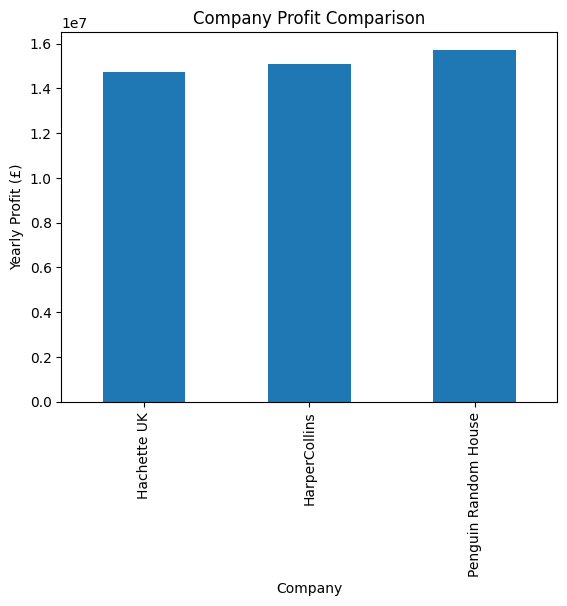

In [4]:
import matplotlib.pyplot as plt

company_profit.plot(kind="bar")

plt.title("Company Profit Comparison")
plt.ylabel("Yearly Profit (£)")
plt.show()


In [5]:
penguin = df[df["Company"] == "Penguin Random House"]

print("Weekly profit:", penguin["Weekly_Profit"].sum())
print("Yearly profit:", penguin["Yearly_Profit"].sum())


Weekly profit: 302512.91000000003
Yearly profit: 15730671.41


In [6]:
df.to_csv("penguin_books_england_dataset.csv", index=False)
